In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols



# Exploration des données

In [23]:
exoplanets=pd.read_csv('all_exoplanets_2021.csv')
print(exoplanets.shape[0], 'lignes')
print(exoplanets.shape[1], 'colonnes')

4575 lignes
23 colonnes


In [3]:
exoplanets.columns

Index(['No.', 'Planet Name', 'Planet Host', 'Num Stars', 'Num Planets',
       'Discovery Method', 'Discovery Year', 'Discovery Facility',
       'Orbital Period Days', 'Orbit Semi-Major Axis', 'Mass', 'Eccentricity',
       'Insolation Flux', 'Equilibrium Temperature', 'Spectral Type',
       'Stellar Effective Temperature', 'Stellar Radius', 'Stellar Mass',
       'Stellar Metallicity', 'Stellar Metallicity Ratio',
       'Stellar Surface Gravity', 'Distance', 'Gaia Magnitude'],
      dtype='object')

In [24]:
exoplanets.dtypes

No.                                int64
Planet Name                       object
Planet Host                       object
Num Stars                          int64
Num Planets                        int64
Discovery Method                  object
Discovery Year                     int64
Discovery Facility                object
Orbital Period Days              float64
Orbit Semi-Major Axis            float64
Mass                             float64
Eccentricity                     float64
Insolation Flux                  float64
Equilibrium Temperature          float64
Spectral Type                     object
Stellar Effective Temperature    float64
Stellar Radius                   float64
Stellar Mass                     float64
Stellar Metallicity              float64
Stellar Metallicity Ratio         object
Stellar Surface Gravity          float64
Distance                         float64
Gaia Magnitude                   float64
dtype: object

In [25]:
exoplanets.isna().sum()

No.                                 0
Planet Name                         0
Planet Host                         0
Num Stars                           0
Num Planets                         0
Discovery Method                    0
Discovery Year                      0
Discovery Facility                  0
Orbital Period Days               162
Orbit Semi-Major Axis            1812
Mass                             2569
Eccentricity                     2868
Insolation Flux                  4205
Equilibrium Temperature          3650
Spectral Type                    3647
Stellar Effective Temperature     349
Stellar Radius                    447
Stellar Mass                      731
Stellar Metallicity              1371
Stellar Metallicity Ratio        1383
Stellar Surface Gravity           603
Distance                          104
Gaia Magnitude                    175
dtype: int64

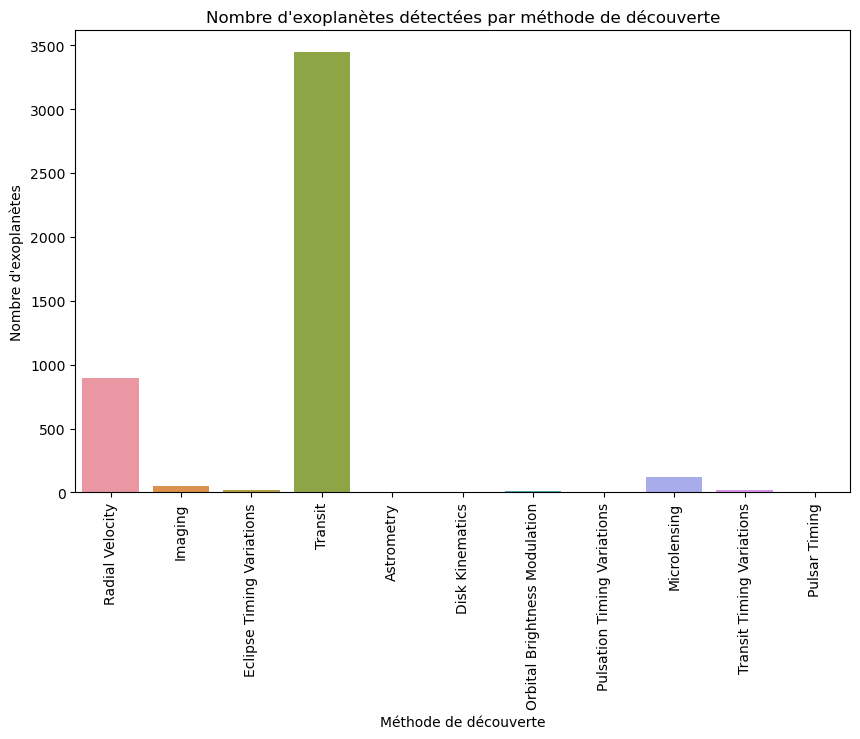

In [40]:
plt.figure(figsize=(10, 6))  

sns.countplot(x='Discovery Method', data=exoplanets)
plt.xticks(rotation=90)  
plt.xlabel('Méthode de découverte')
plt.ylabel('Nombre d\'exoplanètes')
plt.title('Nombre d\'exoplanètes détectées par méthode de découverte')
plt.savefig('methodes.png',bbox_inches='tight')

plt.show()


In [38]:
methodes=exoplanets.groupby('Discovery Method').count().sort_values(by='No.', ascending=False)
methodes['No.']

Discovery Method
Transit                          3444
Radial Velocity                   899
Microlensing                      120
Imaging                            54
Transit Timing Variations          22
Eclipse Timing Variations          16
Orbital Brightness Modulation       9
Pulsar Timing                       7
Pulsation Timing Variations         2
Astrometry                          1
Disk Kinematics                     1
Name: No., dtype: int64

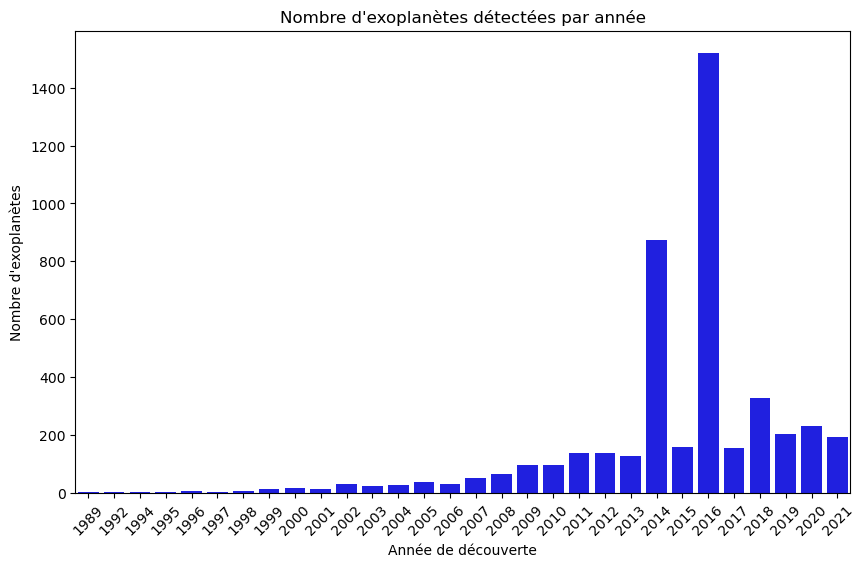

In [41]:
plt.figure(figsize=(10, 6))  

sns.countplot(x='Discovery Year', data=exoplanets, color='blue')
plt.xticks(rotation=45)  
plt.xlabel('Année de découverte')
plt.ylabel('Nombre d\'exoplanètes')
plt.title('Nombre d\'exoplanètes détectées par année')
plt.savefig('evolution.png',bbox_inches='tight')

plt.show()


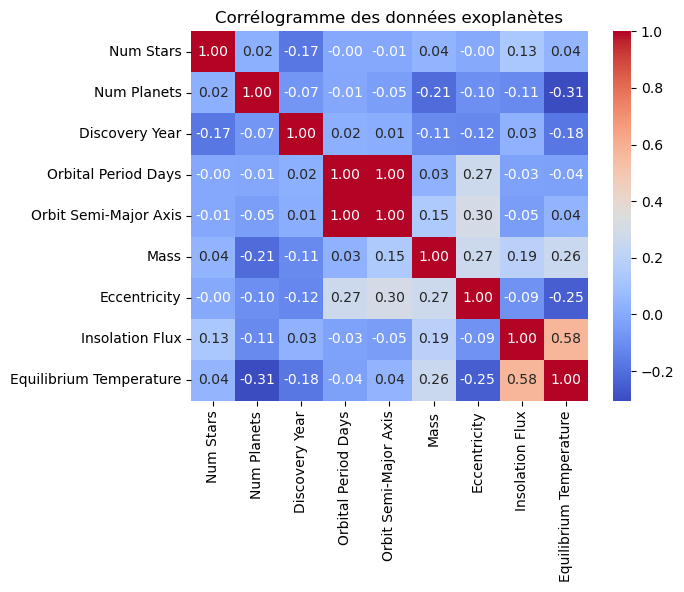

In [49]:
colonnes=['Num Stars', 'Num Planets', 'Discovery Method', 'Discovery Year',
                   'Orbital Period Days', 'Orbit Semi-Major Axis', 'Mass', 'Eccentricity',
                   'Insolation Flux', 'Equilibrium Temperature', 'Spectral Type']
exo=exoplanets[colonnes]

matrice_correlation=exo.corr()
    
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corrélogramme des données exoplanètes')
plt.savefig('correlogramme.png',bbox_inches='tight')

plt.show()


Il semble y avoir une forte corrélation positive entre le flux lumineux et la température d'équilibre de la planète ainsi qu'une coorélation parfaite entre le demi grand axe de l'orbite elliptique et la période orbitale de la planète autour de son étoile.

In [30]:
 
# Effectuer la régression linéaire
model = ols('Q("Orbital Period Days") ~ Q("Orbit Semi-Major Axis")', data=exoplanets).fit()

# Afficher les résultats de la régression
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Q("Orbital Period Days")   R-squared:                       1.000
Model:                                  OLS   Adj. R-squared:                  1.000
Method:                       Least Squares   F-statistic:                 5.764e+06
Date:                      Fri, 18 Aug 2023   Prob (F-statistic):               0.00
Time:                              16:13:33   Log-Likelihood:                -35029.
No. Observations:                      2605   AIC:                         7.006e+04
Df Residuals:                          2603   BIC:                         7.007e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

                               OLS Regression Results                              
Dep. Variable:     log_Orbital_Period_Days   R-squared:                       0.990
Model:                                 OLS   Adj. R-squared:                  0.990
Method:                      Least Squares   F-statistic:                 2.651e+05
Date:                     Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                             16:50:37   Log-Likelihood:                 192.51
No. Observations:                     2605   AIC:                            -381.0
Df Residuals:                         2603   BIC:                            -369.3
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

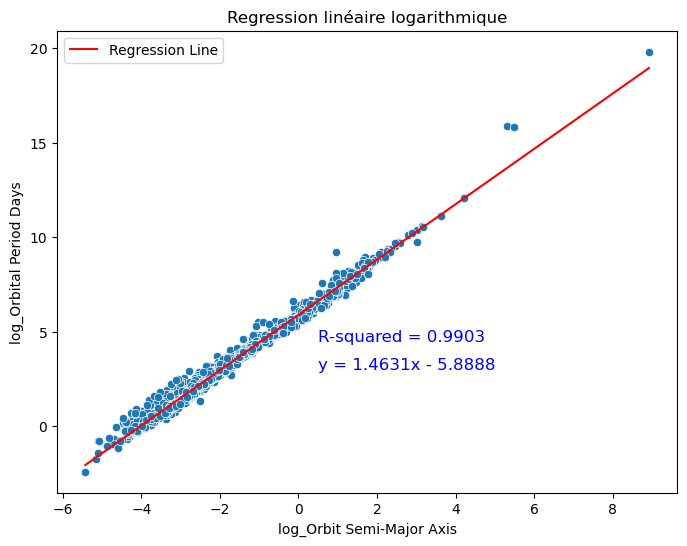

In [55]:
# Appliquer une transformation log aux variables
exoplanets['log_Orbital_Period_Days'] = np.log(exoplanets['Orbital Period Days'])
exoplanets['log_Orbit_Semi_Major_Axis'] = np.log(exoplanets['Orbit Semi-Major Axis'])

# Effectuer la régression linéaire sur les données transformées
model = ols('log_Orbital_Period_Days ~ log_Orbit_Semi_Major_Axis', data=exoplanets).fit()
# Afficher le résumé du modèle avec R-squared
print(model.summary())


# Tracer le scatterplot et la régression linéaire sur les données transformées
plt.figure(figsize=(8, 6))
sns.scatterplot(x='log_Orbit_Semi_Major_Axis', y='log_Orbital_Period_Days', data=exoplanets)
sns.lineplot(x=exoplanets['log_Orbit_Semi_Major_Axis'], y=model.fittedvalues, color='red', label='Regression Line')
plt.xlabel('log_Orbit Semi-Major Axis')
plt.ylabel('log_Orbital Period Days')
plt.title('Regression linéaire logarithmique')

# Ajouter la valeur de R-squared
r_squared = model.rsquared
plt.text(0.5, 4.5, f'R-squared = {r_squared:.4f}', fontsize=12, color='blue')

# Ajouter l'équation de la droite de régression
equation = f'y = {model.params["log_Orbit_Semi_Major_Axis"]:.4f}x - {abs(model.params["Intercept"]):.4f}'
plt.text(0.5, 3, equation, fontsize=12, color='blue')


plt.legend()
plt.savefig('regression1.png',bbox_inches='tight')

plt.show()

On retrouve ici que la période orbitale est proportionnelle à la puissance $1.46 $ ($\approx 1.5=\frac{3}{2}$) du demi grand axe de l'orbite elliptique. On retrouve en réalité ici la 3ème loi de Kepler: le carré de la période est proportionnelle au cube du demi grand axe de l'orbite elliptique.

In [ ]:
 
# Effectuer la régression linéaire
model = ols('Q("Equilibrium Temperature") ~ Q("Insolation Flux")', data=exoplanets).fit()

# Afficher les résultats de la régression
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     log_Equilibrium_Temperature   R-squared:                       0.996
Model:                                     OLS   Adj. R-squared:                  0.996
Method:                          Least Squares   F-statistic:                 5.324e+04
Date:                         Wed, 23 Aug 2023   Prob (F-statistic):          5.31e-278
Time:                                 17:22:09   Log-Likelihood:                 407.69
No. Observations:                          236   AIC:                            -811.4
Df Residuals:                              234   BIC:                            -804.5
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

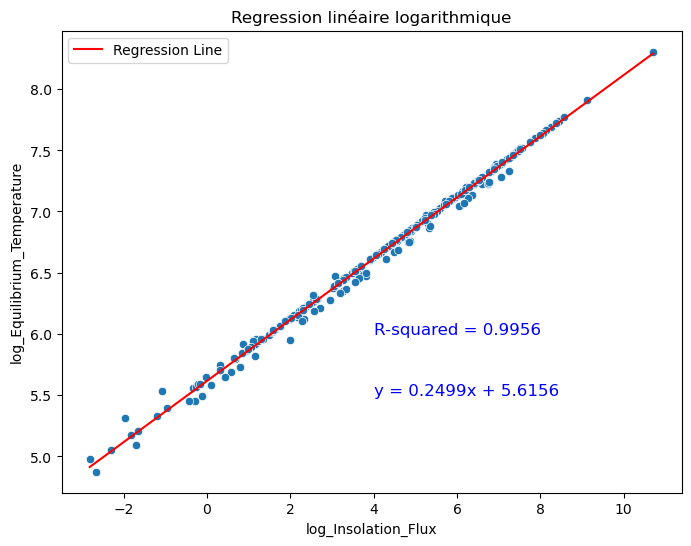

In [65]:
# Appliquer une transformation log aux variables
exoplanets['log_Equilibrium_Temperature'] = np.log(exoplanets['Equilibrium Temperature'])
exoplanets['log_Insolation_Flux'] = np.log(exoplanets['Insolation Flux'])

# Effectuer la régression linéaire sur les données transformées
model = ols('log_Equilibrium_Temperature ~ log_Insolation_Flux', data=exoplanets).fit()
# Afficher le résumé du modèle avec R-squared
print(model.summary())


# Tracer le scatterplot et la régression linéaire sur les données transformées
plt.figure(figsize=(8, 6))
sns.scatterplot(x='log_Insolation_Flux', y='log_Equilibrium_Temperature', data=exoplanets)
sns.lineplot(x=exoplanets['log_Insolation_Flux'], y=model.fittedvalues, color='red', label='Regression Line')
plt.xlabel('log_Insolation_Flux')
plt.ylabel('log_Equilibrium_Temperature')
plt.title('Regression linéaire logarithmique')

# Ajouter la valeur de R-squared
r_squared = model.rsquared
plt.text(4, 6, f'R-squared = {r_squared:.4f}', fontsize=12, color='blue')

# Ajouter l'équation de la droite de régression
equation = f'y = {model.params["log_Insolation_Flux"]:.4f}x + {model.params["Intercept"]:.4f}'
plt.text(4, 5.5, equation, fontsize=12, color='blue')


plt.legend()
plt.savefig('regression2.png',bbox_inches='tight')

plt.show()

Dans cette régression linéaire logarithmique, le coefficient directeur vaut 0.25 avec un R-squared de 0.996. On peut en déduire que T est proportionnel au flux à la puissance 1/4 (on retrouve en réalité la loi de Stefan Boltzmann)

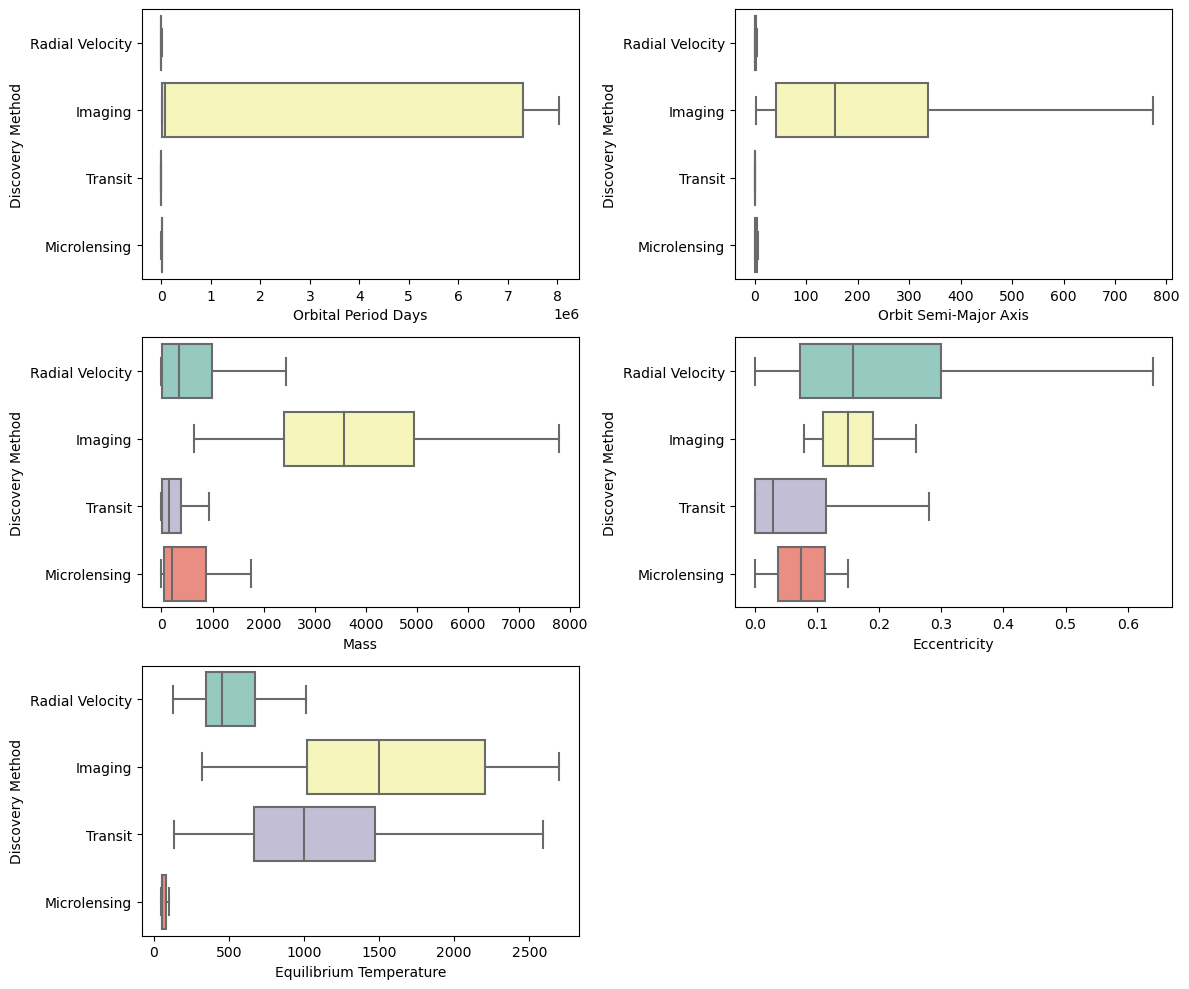

In [45]:
# Sélectionner les méthodes de découverte spécifiées
selected_methods = ['Microlensing', 'Radial Velocity', 'Transit', 'Imaging']
selected_exo = exoplanets[exoplanets['Discovery Method'].isin(selected_methods)]

# Sélectionner les colonnes pour lesquelles vous souhaitez tracer les diagrammes en moustache
selected_columns = ['Orbital Period Days', 'Orbit Semi-Major Axis', 'Mass', 'Eccentricity',
                 'Equilibrium Temperature', 'Discovery Method']

# Créer un sous-DataFrame contenant uniquement les colonnes sélectionnées et les méthodes de découverte spécifiées
selected_exo = selected_exo[selected_columns]

# Tracer les diagrammes en moustache pour chaque colonne (sauf Discovery Method) avec les méthodes de découverte spécifiées
plt.figure(figsize=(12, 10))  # Facultatif : ajuste la taille du graphique
for i, column in enumerate(selected_columns[:-1]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y='Discovery Method',orient='h', x=column, data=selected_exo, palette='Set3', showfliers=False)
    plt.ylabel('Discovery Method')
    plt.xlabel(column)

plt.tight_layout()  # Facultatif : ajuste automatiquement les marges pour éviter les coupures d'étiquettes
plt.savefig('proprietes.png',bbox_inches='tight')

plt.show()

On va effectuer le test d'ANOVA pour comparer les masses des exoplanètes entre les groupes 'Transit', 'Imaging', 'Radial Velocity' et 'Microlensing' qui sont les 4 principales méthodes de détection. Pour cela on fait l'hypothèse que les données sont distribuées normalement et que pour chaque groupes les variances sont égales.



In [13]:
# Sélectionner les colonnes d'intérêt
selected_columns = ['Mass', 'Discovery Method']

# Filtrer les données pour inclure uniquement les groupes 'Transit', 'Imaging', 'Radial Velocity' et 'Microlensing'
selected_exo = exoplanets[exoplanets['Discovery Method'].isin(['Transit', 'Imaging', 'Radial Velocity', 'Microlensing'])]

# Effectuer le test d'ANOVA
model = ols('Mass ~ C(Q("Discovery Method"))+0', data=selected_exo).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher le résumé complet du modèle
print("Résumé du modèle ANOVA - Mass")
print(model.summary())

# Afficher la table d'ANOVA
print("Test d'ANOVA - Mass")
print(anova_table)


Résumé du modèle ANOVA - Mass
                            OLS Regression Results                            
Dep. Variable:                   Mass   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     149.4
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           3.60e-87
Time:                        15:35:25   Log-Likelihood:                -16605.
No. Observations:                1955   AIC:                         3.322e+04
Df Residuals:                    1951   BIC:                         3.324e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Les exoplanètes découvertes par "Imaging" ont une masse estimée de 3875.7880 avec un intervalle de confiance entre 3547.681 et 4203.895.
Les exoplanètes découvertes par "Microlensing" ont une masse estimée de 724.1637 avec un intervalle de confiance entre 512.371 et 935.956.
Les exoplanètes découvertes par "Radial Velocity" ont une masse estimée de 866.9462 avec un intervalle de confiance entre 789.568 et 944.325.
Les exoplanètes découvertes par "Transit" ont une masse estimée de 367.1953 avec un intervalle de confiance entre 289.251 et 445.140.
Ces résultats indiquent que les groupes de méthodes de découverte présentent des différences statistiquement significatives en termes de masse moyenne des exoplanètes. Les valeurs p sont toutes < 0,05, ce qui suggère que les différences observées sont significatives.

En conclusion, le test d'ANOVA indique qu'il existe des différences significatives entre les masses moyennes des exoplanètes en fonction de la méthode de découverte utilisée.

### test de normalité et d'homoscédasticité

In [14]:
from scipy.stats import shapiro, levene


# Sélectionner les colonnes d'intérêt pour le test de normalité
selected_column = 'Mass'
data = exoplanets[selected_column].dropna()

# Test de normalité (Shapiro-Wilk)
statistic, p_value = shapiro(data)
print("Test de normalité -", selected_column)
print("Statistique de test :", statistic)
print("P-valeur :", p_value)

# Test d'égalité des variances (Levene)
group_column = 'Discovery Method'
grouped_data = [data[exoplanets[group_column] == group] for group in exoplanets[group_column].unique()]
statistic, p_value = levene(*grouped_data)
print("\nTest d'égalité des variances")
print("Statistique de test :", statistic)
print("P-valeur :", p_value)


Test de normalité - Mass
Statistique de test : 0.5697681903839111
P-valeur : 0.0

Test d'égalité des variances
Statistique de test : 12.564307673440883
P-valeur : 1.90617186060035e-21


En réalité, la distribution des données ne suit pas une loi normale et l'hypothèse d'égalité des variances n'est pas satisfaite. Le test paramétrique d'ANOVA peut donc être remis en question. On réalise donc un test non paramétrique, celui de Kruskal Wallis. 

In [ ]:
from scipy.stats import kruskal
# Sélectionner les colonnes d'intérêt
selected_column = 'Mass'
selected_group_column = 'Discovery Method'

# Filtrer les données pour inclure uniquement les groupes d'intérêt (méthodes de découverte)
selected_exo = exoplanets[exoplanets[selected_group_column].isin(['Transit', 'Imaging', 'Radial Velocity', 'Microlensing'])]

# Effectuer le test de Kruskal-Wallis
grouped_data = [selected_exo[selected_exo[selected_group_column] == group][selected_column].dropna() for group in selected_exo[selected_group_column].unique()]
statistic, p_value = kruskal(*grouped_data)

print("Test de Kruskal-Wallis -", selected_column)
print("Statistique de test :", statistic)
print("P-valeur :", p_value)


Si la p-valeur est inférieure à un niveau de signification (par exemple, 0,05), cela suggère qu'il y a des différences significatives entre au moins deux groupes. On peut ensuite effectuer des tests post-hoc (par exemple, le test de Dunn ou le test de Conover-Iman) pour déterminer quelles paires de groupes présentent des différences significatives.



# Comparaison des distributions des propriétés des exoplanètes selon de type spectral de son étoile

In [15]:
# Obtenir les différentes valeurs de la colonne "Spectral Type"
spectral_types = exoplanets['Spectral Type'].unique()

print("Différentes valeurs de la colonne 'Spectral Type':")
print(spectral_types)

Différentes valeurs de la colonne 'Spectral Type':
['G8 III' nan 'K0 III' 'K3 III' 'G6 III' 'K7 V' 'G3 IV' 'M5.5/M6' 'M3.5 V'
 'M6' 'M8.5' 'M8' 'K1 III' 'K1.5 III' 'F0 IV' 'G5 V' 'G3 III' 'G5 III'
 'K2 V' 'K0' 'K2 II' 'K5 III' 'K1' 'K3' 'G0' 'K7/M0 V' 'K3 V' 'K5 V'
 'M5.0 V' 'M9-L1' 'M3.5' 'K7' 'M3 V' 'G0 V' 'K1 V' 'F6 V' 'F9 V' 'G2 V'
 'G9 V' 'F8 IV' 'G3 V' 'F9' 'G5' 'G2' 'G8/9 IV' 'K0 V' 'F3 V' 'G2 IV'
 'G0 VI' 'L1.5' 'M0.5' 'F8 V' 'F5 V' 'G6 V' 'G8 IV/V' 'M7.25' 'M4.0 V'
 'M2.5 V' 'M5.5 V' 'M4.5' 'M4 V' 'M3' 'M4.5 V' 'K4.5' 'M1' 'M0 V' 'M2 V'
 'M3.0 V' 'M0.5 V' 'M0' 'M2.5' 'M4' 'M0.0 V' 'M2.0 V' 'M1.5 V' 'M4.0'
 'M3.5 Ve' 'M1 V' 'M2' 'M1.5' 'M1.0 V' 'F2' 'K7e V' 'K4' 'F8' 'K2' 'G3'
 'K' 'G V' 'K V' 'G' 'F' 'B9 Vne' 'G9 III' 'G4 V' 'K2 III' 'K9 V' 'G7 III'
 'G4 IV' 'G7 V' 'F5' 'G1 V' 'K0 IV-V' 'F8 IV/V' 'K1 IV' 'K3.5 V' 'G8 V'
 'F7 V' 'G8' 'K2.5 V' 'G5 IV' 'K3 IV' 'K0 III-IV' 'G5 IV/V' 'M1 III'
 'G0 IV' 'G2 IV-V' 'G8 IV' 'F9 IV/V' 'K5' 'G1 IV/V' 'G3/G5 V' 'G1.5 V'
 'G8/K0' 'K0 IV' 'F

In [47]:
# Fonction personnalisée pour simplifier les classes spectrales
def simplify_spectral_type(spectral_type):
    if pd.notna(spectral_type):  # Vérifier si la valeur n'est pas NaN
        spectral_str = str(spectral_type).upper()
        if 'G' in spectral_str:
            return 'G'
        elif 'M' in spectral_str:
            return 'M'
        elif 'K' in spectral_str:
            return 'K'
        elif 'F' in spectral_str:
            return 'F'
        elif 'A' in spectral_str:
            return 'A'
        elif 'B' in spectral_str:
            return 'B'
        elif 'O' in spectral_str:
            return 'O'
    return None

# Créer la nouvelle colonne "Spectral Type Simplified"
exoplanets['Spectral Type Simplified'] = exoplanets['Spectral Type'].apply(simplify_spectral_type)

# Afficher le DataFrame avec la nouvelle colonne
print(exoplanets['Spectral Type Simplified'].unique())

['G' None 'K' 'M' 'F' 'B' 'A']


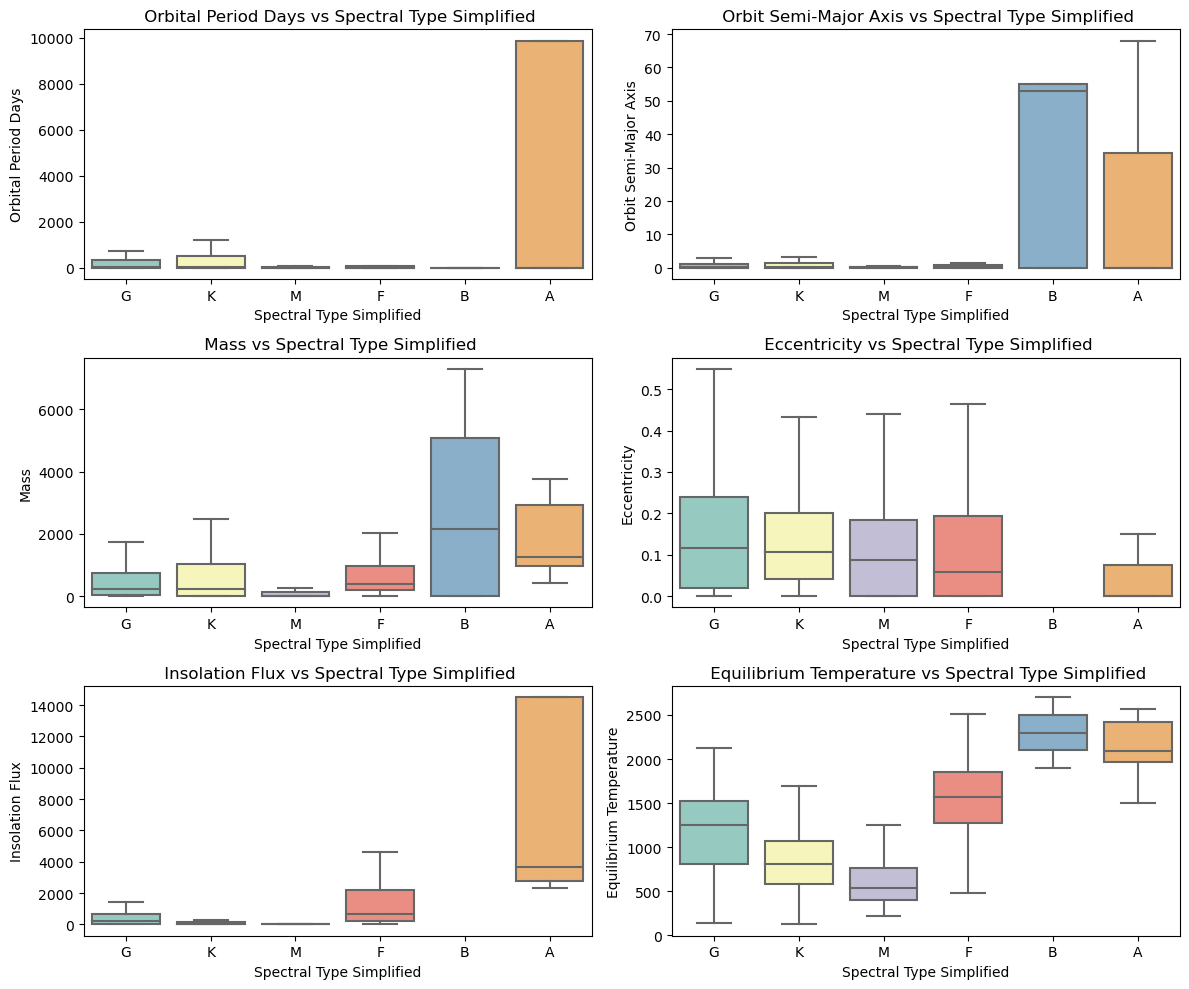

In [48]:
# Liste des propriétés à comparer
selected_properties=['Orbital Period Days', 'Orbit Semi-Major Axis', 'Mass', 'Eccentricity',
                   'Insolation Flux', 'Equilibrium Temperature']


# Tracer les boîtes à moustaches pour chaque propriété en fonction du type spectral simplifié
plt.figure(figsize=(12, 10))

for i,property_name in enumerate(selected_properties):
    plt.subplot(3, 2,i+1)

    sns.boxplot(x='Spectral Type Simplified', y=property_name, data=exoplanets, palette='Set3', showfliers=False)
    plt.xlabel('Spectral Type Simplified')
    plt.ylabel(property_name)
    plt.title(f' {property_name} vs Spectral Type Simplified')
plt.tight_layout()  # Ajuster automatiquement l'espacement entre les sous-graphiques
plt.savefig('proprietes2.png',bbox_inches='tight')

plt.show()

On peut maintenant réaliser une ANOVA à deux facteurs en prenant en compte l'interaction entre la méthode de détection et le type spectrale de l'étoile autour de laquelle gravite l'exoplanète afin de connaître l'influence de ces deux variables sur la masse.

In [68]:
# Sélectionner les colonnes d'intérêt
selected_columns = ['Mass', 'Discovery Method']

# Filtrer les données pour inclure uniquement les groupes 'Transit', 'Imaging', 'Radial Velocity' et 'Microlensing'
selected_exo = exoplanets[exoplanets['Discovery Method'].isin(['Transit', 'Imaging', 'Radial Velocity', 'Microlensing'])]

# Effectuer le test d'ANOVA
model = ols('Mass ~ C(Q("Discovery Method")) + C(Q("Spectral Type Simplified")) + C(Q("Discovery Method")):C(Q("Spectral Type Simplified"))+0', data=selected_exo).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher le résumé complet du modèle
print("Résumé du modèle ANOVA - Mass")
print(model.summary())

# Afficher la table d'ANOVA
print("Test d'ANOVA - Mass")
print(anova_table)




Résumé du modèle ANOVA - Mass
                            OLS Regression Results                            
Dep. Variable:                   Mass   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     22.20
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           2.52e-56
Time:                        14:41:15   Log-Likelihood:                -7069.7
No. Observations:                 831   AIC:                         1.418e+04
Df Residuals:                     813   BIC:                         1.426e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 11
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
"C(Q(""Discovery Method""))",1.139632e+09,4.0,194.169910,8.310430e-117
"C(Q(""Spectral Type Simplified""))",3.226367e+05,5.0,0.043977,8.339498e-01
"C(Q(""Discovery Method"")):C(Q(""Spectral Type Simplified""))",6.389677e+07,15.0,2.903119,9.185136e-04
Residual,1.192926e+09,813.0,NaN,NaN
